### **PREDIÇÃO POR AM - DADOS DO HOSPITAL SÍRIO-LIBANÊS (HSL)**



Data: 12/11/2021

Filipe Loyola Lopes





Informativo: 

GRUPO_0 - pacientes com exames provindos apenas do pronto socorro (NÃO_GRAVE); 

GRUPO_1 - pacientes com exames provindos do pronto socorro e internação (NÃO_GRAVE);

GRUPO_2 - pacientes com exames provindos do pronto socorro e UTI (GRAVE).

GRUPO_3 - pacientes com exames provindos do pronto socorro, internação e UTI (GRAVE).

# **CENÁRIO 4: APENAS GRUPO 0 (NÃO GRAVE) E GRUPO 2 (GRAVE)**

In [1]:
#Bibliotecas

import numpy as np
import pandas as pd
from pandas import DataFrame
import csv
from numpy import mean
from numpy import std
from numpy import correlate
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from google.colab import files
import datetime as dt
from matplotlib import pyplot as plt
plt.style.use('default')
import seaborn as sns
import warnings
import datetime as dt
from datetime import date

import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestClassifier

import time

from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **IMPORTAÇÃO DOS DADOS**

In [3]:
df_sirio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021 dezembro Artigo/AM/sirio_aprendizado_v3.csv', sep='|', encoding='utf-8')
print(df_sirio.shape)
df_sirio.head(3)

(4320, 33)


,Unnamed: 0,ID_PACIENTE,GRUPO,Idade,Sexo,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
0,0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,M,26.0,24.0,40.0,0.6,34.5,1.02,60.0,0.9,4.65,29.7,40.0,13.8,6440.0,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,4.0,0.11,13.1,138.0,35.0,86.0,9.8,1
1,1,000F0BC139D2846DB86AA32B8F05B215,GRUPO_0,41,M,NaN,NaN,20.0,0.4,33.2,1.04,160.0,3.4,4.71,27.6,39.2,13.0,4730.0,2360.0,49.9,420.0,8.9,1770.0,37.4,279000.0,4.3,NaN,14.0,142.0,33.0,83.2,10.0,1
2,2,0028785949D91BD93442838FC898E229,GRUPO_0,31,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df_sirio = df_sirio.drop(columns=(['Unnamed: 0', 'Sexo']))
print(df_sirio.shape)
df_sirio.head(1)

(4320, 31)


,ID_PACIENTE,GRUPO,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,26.0,24.0,40.0,0.6,34.5,1.02,60.0,0.9,4.65,29.7,40.0,13.8,6440.0,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,4.0,0.11,13.1,138.0,35.0,86.0,9.8,1


In [5]:
cenario1 = df_sirio

cenario1.drop(cenario1.loc[cenario1['GRUPO']=='GRUPO_1'].index, inplace=True)

cenario1.drop(cenario1.loc[cenario1['GRUPO']=='GRUPO_3'].index, inplace=True)

print('GRUPO_0: ', cenario1[cenario1['GRUPO']=='GRUPO_0'].shape)

print('GRUPO_1: ', cenario1[cenario1['GRUPO']=='GRUPO_1'].shape)

print('GRUPO_2: ', cenario1[cenario1['GRUPO']=='GRUPO_2'].shape)

print('GRUPO_3: ', cenario1[cenario1['GRUPO']=='GRUPO_3'].shape)

GRUPO_0:  (3393, 31)
GRUPO_1:  (0, 31)
GRUPO_2:  (85, 31)
GRUPO_3:  (0, 31)


### **CRIANDO COLUNA GRAVIDADE (TARGET)**

GRAVE -> 1

NÃO GRAVE -> 0

*   Item da lista
*   Item da lista



In [6]:
d_2 = {'GRUPO_2' : 1, 'GRUPO_0':0}
cenario1['GRAVIDADE'] = cenario1['GRUPO'].map(d_2) #colocando 0 e 1 na coluna target
cenario1.head(6)

,ID_PACIENTE,GRUPO,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,26.0,24.0,40.0,0.6,34.5,1.02,60.0,0.9,4.65,29.7,40.0,13.8,6440.0,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,4.0,0.11,13.1,138.0,35.0,86.0,9.8,1,0
1,000F0BC139D2846DB86AA32B8F05B215,GRUPO_0,41,NaN,NaN,20.0,0.4,33.2,1.04,160.0,3.4,4.71,27.6,39.2,13.0,4730.0,2360.0,49.9,420.0,8.9,1770.0,37.4,279000.0,4.3,NaN,14.0,142.0,33.0,83.2,10.0,1,0
2,0028785949D91BD93442838FC898E229,GRUPO_0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,002B919CC409B11DE52FB212379BE2CB,GRUPO_0,41,26.0,26.0,40.0,0.6,32.9,0.73,240.0,3.4,4.69,29.0,41.4,13.6,7050.0,1630.0,23.1,590.0,8.4,4550.0,64.5,275000.0,NaN,0.12,13.3,NaN,30.0,88.3,11.2,0,0
4,003051C9B19101D1C10C5DC654384017,GRUPO_0,36,27.0,18.0,10.0,0.3,33.4,0.97,30.0,0.9,4.97,28.0,41.6,13.9,3240.0,1390.0,42.9,250.0,7.7,1560.0,48.2,231000.0,4.2,0.08,14.4,139.0,16.0,83.7,10.4,1,0
7,0060E857BDD25FCC2D86F44CBB5D9FD9,GRUPO_0,22,43.0,32.0,10.0,0.2,35.6,1.24,30.0,0.6,6.36,27.7,49.4,17.6,4680.0,870.0,18.6,600.0,12.8,3170.0,67.8,116000.0,4.1,0.65,14.6,139.0,22.0,77.7,10.9,1,0


In [7]:
cenario1 = cenario1.drop(columns=['GRUPO'])

### **SEPARANDO GRUPOS PARA TREINO E GRUPOS PARA TESTE**

In [8]:
#obs: apagar coluna GRAVIDADE depois

X_train, X_test, y_train, y_test = train_test_split(cenario1.drop(['ID_PACIENTE'], axis=1), cenario1['GRAVIDADE'],
                                                    test_size = 0.3, random_state=0)
print('Dados de treino {}'.format(X_train.shape))
print('\n')
print("Dados de teste{}". format(X_test.shape))

Dados de treino (2434, 30)


Dados de teste(1044, 30)


In [9]:
y_train[y_train == 0].shape

(2374,)

In [10]:
y_train[y_train == 1].shape

(60,)

In [11]:
y_test[y_test == 0].shape

(1019,)

In [12]:
y_test[y_test == 1].shape

(25,)

In [13]:
X_train.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
978,53,23.0,21.0,60.0,1.1,32.0,0.80,160.0,3.0,4.79,29.2,43.7,14.0,5410.0,2160.0,39.9,590.0,10.9,2440.0,45.1,221000.0,NaN,NaN,12.6,NaN,27.0,91.2,11.6,1,0
1261,43,45.0,30.0,30.0,0.6,36.0,1.07,70.0,1.4,5.33,30.8,45.6,16.4,5050.0,1850.0,36.6,410.0,8.1,2690.0,53.3,207000.0,NaN,NaN,12.2,NaN,NaN,85.6,10.2,1,0
2247,25,NaN,NaN,50.0,0.9,32.6,0.77,90.0,1.7,4.35,28.7,38.4,12.5,5280.0,1900.0,36.0,290.0,5.5,2950.0,55.9,253000.0,4.1,NaN,12.6,NaN,NaN,88.3,10.8,0,0
2023,50,NaN,NaN,40.0,0.9,32.4,0.75,200.0,4.3,4.48,26.3,36.4,11.8,4690.0,1860.0,39.7,320.0,6.8,2270.0,48.3,290000.0,NaN,NaN,15.0,NaN,NaN,81.3,10.1,0,0
353,36,21.0,23.0,50.0,0.9,34.5,1.02,430.0,7.5,5.05,29.1,42.6,14.7,5700.0,2160.0,37.9,390.0,6.8,2670.0,46.9,207000.0,3.5,NaN,12.3,139.0,35.0,84.4,11.0,1,0
1829,70,24.0,34.0,30.0,1.2,32.8,1.50,30.0,1.2,4.17,28.5,36.3,11.9,2540.0,1070.0,42.1,330.0,13.0,1080.0,42.5,234000.0,3.4,1.04,14.6,142.0,34.0,87.1,10.3,1,0
2084,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1884,57,NaN,NaN,30.0,0.4,36.5,NaN,100.0,1.2,4.59,31.4,39.5,14.4,8550.0,2290.0,26.8,840.0,9.8,5290.0,61.8,178000.0,NaN,NaN,12.7,NaN,NaN,86.1,11.3,1,0
1851,46,11.0,16.0,30.0,0.4,34.6,0.80,50.0,0.7,4.59,30.5,40.5,14.0,7200.0,1770.0,24.6,350.0,4.9,5000.0,69.4,250000.0,NaN,NaN,12.6,NaN,32.0,88.2,10.9,0,0
866,40,17.0,25.0,30.0,0.8,34.5,0.94,40.0,1.0,5.29,28.7,44.0,15.2,3830.0,1830.0,47.8,480.0,12.5,1450.0,37.9,141000.0,3.7,0.22,12.7,137.0,31.0,83.2,11.6,1,0


In [14]:
y_train.head(3)

978     0
1261    0
2247    0
Name: GRAVIDADE, dtype: int64

In [15]:
X_test.head(3)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
1256,20,NaN,NaN,40.0,0.6,32.3,NaN,130.0,1.8,5.14,26.8,42.7,13.8,7130.0,970.0,13.6,620.0,8.7,5370.0,75.3,271000.0,NaN,0.14,12.8,NaN,NaN,83.1,10.0,1,0
4122,57,NaN,NaN,70.0,0.6,33.0,NaN,690.0,5.5,6.34,27.9,53.6,17.7,12550.0,3760.0,30.0,1210.0,9.6,6820.0,54.3,467000.0,NaN,NaN,13.2,NaN,NaN,84.5,10.0,1,0
3501,81,25.0,NaN,10.0,0.3,32.4,5.74,100.0,2.8,3.07,29.6,28.1,9.1,3540.0,700.0,19.8,280.0,7.9,2450.0,69.2,86000.0,6.4,3.30,13.4,NaN,168.0,91.5,9.7,0,0


In [16]:
y_test.head(3)

1256    0
4122    0
3501    0
Name: GRAVIDADE, dtype: int64

In [17]:
X_train.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
978,53,23.0,21.0,60.0,1.1,32.0,0.80,160.0,3.0,4.79,29.2,43.7,14.0,5410.0,2160.0,39.9,590.0,10.9,2440.0,45.1,221000.0,NaN,NaN,12.6,NaN,27.0,91.2,11.6,1,0
1261,43,45.0,30.0,30.0,0.6,36.0,1.07,70.0,1.4,5.33,30.8,45.6,16.4,5050.0,1850.0,36.6,410.0,8.1,2690.0,53.3,207000.0,NaN,NaN,12.2,NaN,NaN,85.6,10.2,1,0
2247,25,NaN,NaN,50.0,0.9,32.6,0.77,90.0,1.7,4.35,28.7,38.4,12.5,5280.0,1900.0,36.0,290.0,5.5,2950.0,55.9,253000.0,4.1,NaN,12.6,NaN,NaN,88.3,10.8,0,0
2023,50,NaN,NaN,40.0,0.9,32.4,0.75,200.0,4.3,4.48,26.3,36.4,11.8,4690.0,1860.0,39.7,320.0,6.8,2270.0,48.3,290000.0,NaN,NaN,15.0,NaN,NaN,81.3,10.1,0,0
353,36,21.0,23.0,50.0,0.9,34.5,1.02,430.0,7.5,5.05,29.1,42.6,14.7,5700.0,2160.0,37.9,390.0,6.8,2670.0,46.9,207000.0,3.5,NaN,12.3,139.0,35.0,84.4,11.0,1,0
1829,70,24.0,34.0,30.0,1.2,32.8,1.50,30.0,1.2,4.17,28.5,36.3,11.9,2540.0,1070.0,42.1,330.0,13.0,1080.0,42.5,234000.0,3.4,1.04,14.6,142.0,34.0,87.1,10.3,1,0
2084,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1884,57,NaN,NaN,30.0,0.4,36.5,NaN,100.0,1.2,4.59,31.4,39.5,14.4,8550.0,2290.0,26.8,840.0,9.8,5290.0,61.8,178000.0,NaN,NaN,12.7,NaN,NaN,86.1,11.3,1,0
1851,46,11.0,16.0,30.0,0.4,34.6,0.80,50.0,0.7,4.59,30.5,40.5,14.0,7200.0,1770.0,24.6,350.0,4.9,5000.0,69.4,250000.0,NaN,NaN,12.6,NaN,32.0,88.2,10.9,0,0
866,40,17.0,25.0,30.0,0.8,34.5,0.94,40.0,1.0,5.29,28.7,44.0,15.2,3830.0,1830.0,47.8,480.0,12.5,1450.0,37.9,141000.0,3.7,0.22,12.7,137.0,31.0,83.2,11.6,1,0


In [18]:
target = X_train['GRAVIDADE']
target

978     0
1261    0
2247    0
2023    0
353     0
       ..
1065    0
4060    0
2093    0
3254    0
3411    0
Name: GRAVIDADE, Length: 2434, dtype: int64

### **PREPARANDO OS DADOS PARA O APRENDIZADO**

In [19]:
Q1 = X_train.quantile(.25)
Q3 = X_train.quantile(.75)

IIQ = Q3 - Q1
limite_inferior = Q1 - 3*IIQ
limite_superior = Q3 + 3*IIQ

In [20]:
#aplicando o filtro apenas nos dados de treino

selecao = (X_train >= limite_inferior) & (X_train <= limite_superior)

novos_dados = X_train[selecao]

#novos_dados.apply(lambda x: x.fillna(x.median()), axis=0)

In [21]:
novos_dados.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
978,53,23.0,21.0,60.0,1.1,32.0,0.80,160.0,3.0,4.79,29.2,43.7,14.0,5410.0,2160.0,39.9,590.0,10.9,2440.0,45.1,221000.0,NaN,NaN,12.6,NaN,27.0,91.2,11.6,1,0.0
1261,43,45.0,30.0,30.0,0.6,36.0,1.07,70.0,1.4,5.33,30.8,45.6,16.4,5050.0,1850.0,36.6,410.0,8.1,2690.0,53.3,207000.0,NaN,NaN,12.2,NaN,NaN,85.6,10.2,1,0.0
2247,25,NaN,NaN,50.0,0.9,32.6,0.77,90.0,1.7,4.35,28.7,38.4,12.5,5280.0,1900.0,36.0,290.0,5.5,2950.0,55.9,253000.0,4.1,NaN,12.6,NaN,NaN,88.3,10.8,0,0.0
2023,50,NaN,NaN,40.0,0.9,32.4,0.75,200.0,4.3,4.48,26.3,36.4,11.8,4690.0,1860.0,39.7,320.0,6.8,2270.0,48.3,290000.0,NaN,NaN,15.0,NaN,NaN,81.3,10.1,0,0.0
353,36,21.0,23.0,50.0,0.9,34.5,1.02,430.0,7.5,5.05,29.1,42.6,14.7,5700.0,2160.0,37.9,390.0,6.8,2670.0,46.9,207000.0,3.5,NaN,12.3,139.0,35.0,84.4,11.0,1,0.0
1829,70,24.0,34.0,30.0,1.2,32.8,1.50,30.0,1.2,4.17,28.5,36.3,11.9,2540.0,1070.0,42.1,330.0,13.0,1080.0,42.5,234000.0,3.4,1.04,14.6,142.0,34.0,87.1,10.3,1,0.0
2084,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
1884,57,NaN,NaN,30.0,0.4,36.5,NaN,100.0,1.2,4.59,31.4,39.5,14.4,8550.0,2290.0,26.8,840.0,9.8,5290.0,61.8,178000.0,NaN,NaN,12.7,NaN,NaN,86.1,11.3,1,0.0
1851,46,11.0,16.0,30.0,0.4,34.6,0.80,50.0,0.7,4.59,30.5,40.5,14.0,7200.0,1770.0,24.6,350.0,4.9,5000.0,69.4,250000.0,NaN,NaN,12.6,NaN,32.0,88.2,10.9,0,0.0
866,40,17.0,25.0,30.0,0.8,34.5,0.94,40.0,1.0,5.29,28.7,44.0,15.2,3830.0,1830.0,47.8,480.0,12.5,1450.0,37.9,141000.0,3.7,0.22,12.7,137.0,31.0,83.2,11.6,1,0.0


In [22]:
novos_dados['GRAVIDADE'] = target

In [23]:
novos_dados.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
978,53,23.0,21.0,60.0,1.1,32.0,0.80,160.0,3.0,4.79,29.2,43.7,14.0,5410.0,2160.0,39.9,590.0,10.9,2440.0,45.1,221000.0,NaN,NaN,12.6,NaN,27.0,91.2,11.6,1,0
1261,43,45.0,30.0,30.0,0.6,36.0,1.07,70.0,1.4,5.33,30.8,45.6,16.4,5050.0,1850.0,36.6,410.0,8.1,2690.0,53.3,207000.0,NaN,NaN,12.2,NaN,NaN,85.6,10.2,1,0
2247,25,NaN,NaN,50.0,0.9,32.6,0.77,90.0,1.7,4.35,28.7,38.4,12.5,5280.0,1900.0,36.0,290.0,5.5,2950.0,55.9,253000.0,4.1,NaN,12.6,NaN,NaN,88.3,10.8,0,0
2023,50,NaN,NaN,40.0,0.9,32.4,0.75,200.0,4.3,4.48,26.3,36.4,11.8,4690.0,1860.0,39.7,320.0,6.8,2270.0,48.3,290000.0,NaN,NaN,15.0,NaN,NaN,81.3,10.1,0,0
353,36,21.0,23.0,50.0,0.9,34.5,1.02,430.0,7.5,5.05,29.1,42.6,14.7,5700.0,2160.0,37.9,390.0,6.8,2670.0,46.9,207000.0,3.5,NaN,12.3,139.0,35.0,84.4,11.0,1,0
1829,70,24.0,34.0,30.0,1.2,32.8,1.50,30.0,1.2,4.17,28.5,36.3,11.9,2540.0,1070.0,42.1,330.0,13.0,1080.0,42.5,234000.0,3.4,1.04,14.6,142.0,34.0,87.1,10.3,1,0
2084,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1884,57,NaN,NaN,30.0,0.4,36.5,NaN,100.0,1.2,4.59,31.4,39.5,14.4,8550.0,2290.0,26.8,840.0,9.8,5290.0,61.8,178000.0,NaN,NaN,12.7,NaN,NaN,86.1,11.3,1,0
1851,46,11.0,16.0,30.0,0.4,34.6,0.80,50.0,0.7,4.59,30.5,40.5,14.0,7200.0,1770.0,24.6,350.0,4.9,5000.0,69.4,250000.0,NaN,NaN,12.6,NaN,32.0,88.2,10.9,0,0
866,40,17.0,25.0,30.0,0.8,34.5,0.94,40.0,1.0,5.29,28.7,44.0,15.2,3830.0,1830.0,47.8,480.0,12.5,1450.0,37.9,141000.0,3.7,0.22,12.7,137.0,31.0,83.2,11.6,1,0


In [24]:
novos_dados[novos_dados['GRAVIDADE']==1]

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
3855,81,NaN,NaN,40.0,0.7,32.4,NaN,70.0,1.3,4.78,28.0,41.3,13.4,5340.0,1740.0,32.6,800.0,15.0,2690.0,50.4,243000.0,NaN,0.75,13.2,NaN,NaN,86.4,10.0,0,1
656,84,8.0,15.0,20.0,0.3,31.6,NaN,310.0,4.7,4.15,28.4,37.4,11.8,6610.0,1140.0,17.2,510.0,7.7,4630.0,70.1,220000.0,4.6,0.41,14.9,138.0,NaN,90.1,10.9,1,1
321,69,19.0,28.0,0.0,0.0,34.9,1.64,10.0,0.3,3.43,33.8,33.2,11.6,3330.0,910.0,27.3,230.0,6.9,2180.0,65.5,99000.0,NaN,NaN,12.6,NaN,58.0,96.8,9.5,0,1
2633,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3965,28,NaN,NaN,10.0,0.1,34.2,0.79,0.0,0.0,5.30,29.4,45.6,15.6,10750.0,1230.0,11.4,940.0,8.7,8580.0,79.8,190000.0,NaN,2.18,13.4,NaN,57.0,86.0,9.6,1,1
912,2,NaN,NaN,10.0,0.2,34.3,NaN,20.0,0.4,3.37,24.9,24.5,8.4,4610.0,1950.0,42.3,180.0,3.9,2450.0,53.2,124000.0,NaN,NaN,NaN,NaN,NaN,72.7,NaN,1,1
732,58,42.0,36.0,10.0,0.2,33.6,1.20,10.0,0.2,5.08,29.7,44.9,15.1,6380.0,1040.0,16.3,390.0,6.1,4930.0,77.2,212000.0,4.0,3.01,13.4,140.0,44.0,88.4,10.8,1,1
1039,33,19.0,17.0,40.0,0.7,35.3,0.73,70.0,1.3,4.77,30.6,41.4,14.6,5360.0,1730.0,32.3,440.0,8.2,3080.0,57.5,263000.0,3.8,0.05,12.4,141.0,39.0,86.8,10.9,1,1
744,88,10.0,21.0,20.0,0.5,32.9,1.03,0.0,0.0,5.15,28.9,45.3,14.9,3940.0,780.0,19.8,500.0,12.7,2640.0,67.0,169000.0,4.1,1.57,13.1,137.0,34.0,88.0,9.1,1,1
4020,87,11.0,15.0,20.0,0.2,33.4,1.31,220.0,2.3,4.40,31.6,41.6,13.9,9370.0,1300.0,13.9,860.0,9.2,6970.0,74.4,158000.0,4.0,0.37,13.2,144.0,56.0,94.5,11.2,1,1


### **TRATANDO VALORES AUSENTES**

In [25]:
novos_dados.isnull().sum()

Idade                         0
ALT (TGP)                   982
AST (TGO)                   991
Basófilos                   261
Basófilos (%)               245
CHCM                        241
Creatinina                  549
Eosinófilos                 267
Eosinófilos (%)             266
Eritrócitos                 240
HCM                         264
Hematócrito                 240
Hemoglobina                 240
Leucócitos                  255
Linfócitos                  245
Linfócitos (%)              242
Monócitos                   252
Monócitos (%)               249
Neutrófilos                 264
Neutrófilos (%)             241
Plaquetas                   235
Potássio                    897
Proteína C-Reativa          931
RDW                         290
Sódio                       939
Uréia                       691
VCM                         259
Volume plaquetário médio    257
SEXO                          0
GRAVIDADE                     0
dtype: int64

In [26]:
mediana_NAO_GRAVE = novos_dados[novos_dados['GRAVIDADE']==0].median(skipna=True)
mediana_NAO_GRAVE

Idade                           42.000
ALT (TGP)                       22.000
AST (TGO)                       22.000
Basófilos                       30.000
Basófilos (%)                    0.500
CHCM                            33.600
Creatinina                       0.890
Eosinófilos                     80.000
Eosinófilos (%)                  1.400
Eritrócitos                      4.745
HCM                             29.600
Hematócrito                     41.600
Hemoglobina                     14.000
Leucócitos                    5860.000
Linfócitos                    1730.000
Linfócitos (%)                  30.400
Monócitos                      510.000
Monócitos (%)                    8.500
Neutrófilos                   3340.000
Neutrófilos (%)                 57.800
Plaquetas                   227000.000
Potássio                         4.000
Proteína C-Reativa               0.310
RDW                             12.600
Sódio                          139.000
Uréia                    

In [27]:
mediana_GRAVE = novos_dados[novos_dados['GRAVIDADE']==1].median(skipna=True)
mediana_GRAVE

Idade                           64.00
ALT (TGP)                       24.00
AST (TGO)                       23.00
Basófilos                       30.00
Basófilos (%)                    0.40
CHCM                            33.40
Creatinina                       1.01
Eosinófilos                     60.00
Eosinófilos (%)                  1.00
Eritrócitos                      4.79
HCM                             29.40
Hematócrito                     42.90
Hemoglobina                     14.10
Leucócitos                    6570.00
Linfócitos                    1510.00
Linfócitos (%)                  24.10
Monócitos                      570.00
Monócitos (%)                    8.05
Neutrófilos                   4050.00
Neutrófilos (%)                 65.70
Plaquetas                   207500.00
Potássio                         4.00
Proteína C-Reativa               0.58
RDW                             13.20
Sódio                          140.00
Uréia                           35.00
VCM         

In [28]:
mediana_GRAVE - mediana_NAO_GRAVE

Idade                          22.000
ALT (TGP)                       2.000
AST (TGO)                       1.000
Basófilos                       0.000
Basófilos (%)                  -0.100
CHCM                           -0.200
Creatinina                      0.120
Eosinófilos                   -20.000
Eosinófilos (%)                -0.400
Eritrócitos                     0.045
HCM                            -0.200
Hematócrito                     1.300
Hemoglobina                     0.100
Leucócitos                    710.000
Linfócitos                   -220.000
Linfócitos (%)                 -6.300
Monócitos                      60.000
Monócitos (%)                  -0.450
Neutrófilos                   710.000
Neutrófilos (%)                 7.900
Plaquetas                  -19500.000
Potássio                        0.000
Proteína C-Reativa              0.270
RDW                             0.600
Sódio                           1.000
Uréia                           6.000
VCM         

In [29]:
novos_dados.loc[novos_dados['GRAVIDADE']==0] = novos_dados[novos_dados['GRAVIDADE']==0].fillna(mediana_NAO_GRAVE)

novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
978,53,23.0,21.0,60.0,1.1,32.0,0.80,160.0,3.0,4.790,29.2,43.7,14.0,5410.0,2160.0,39.9,590.0,10.9,2440.0,45.1,221000.0,4.0,0.31,12.6,139.0,27.0,91.2,11.6,1,0
1261,43,45.0,30.0,30.0,0.6,36.0,1.07,70.0,1.4,5.330,30.8,45.6,16.4,5050.0,1850.0,36.6,410.0,8.1,2690.0,53.3,207000.0,4.0,0.31,12.2,139.0,29.0,85.6,10.2,1,0
2247,25,22.0,22.0,50.0,0.9,32.6,0.77,90.0,1.7,4.350,28.7,38.4,12.5,5280.0,1900.0,36.0,290.0,5.5,2950.0,55.9,253000.0,4.1,0.31,12.6,139.0,29.0,88.3,10.8,0,0
2023,50,22.0,22.0,40.0,0.9,32.4,0.75,200.0,4.3,4.480,26.3,36.4,11.8,4690.0,1860.0,39.7,320.0,6.8,2270.0,48.3,290000.0,4.0,0.31,15.0,139.0,29.0,81.3,10.1,0,0
353,36,21.0,23.0,50.0,0.9,34.5,1.02,430.0,7.5,5.050,29.1,42.6,14.7,5700.0,2160.0,37.9,390.0,6.8,2670.0,46.9,207000.0,3.5,0.31,12.3,139.0,35.0,84.4,11.0,1,0
1829,70,24.0,34.0,30.0,1.2,32.8,1.50,30.0,1.2,4.170,28.5,36.3,11.9,2540.0,1070.0,42.1,330.0,13.0,1080.0,42.5,234000.0,3.4,1.04,14.6,142.0,34.0,87.1,10.3,1,0
2084,28,22.0,22.0,30.0,0.5,33.6,0.89,80.0,1.4,4.745,29.6,41.6,14.0,5860.0,1730.0,30.4,510.0,8.5,3340.0,57.8,227000.0,4.0,0.31,12.6,139.0,29.0,87.8,10.3,0,0
1884,57,22.0,22.0,30.0,0.4,36.5,0.89,100.0,1.2,4.590,31.4,39.5,14.4,8550.0,2290.0,26.8,840.0,9.8,5290.0,61.8,178000.0,4.0,0.31,12.7,139.0,29.0,86.1,11.3,1,0
1851,46,11.0,16.0,30.0,0.4,34.6,0.80,50.0,0.7,4.590,30.5,40.5,14.0,7200.0,1770.0,24.6,350.0,4.9,5000.0,69.4,250000.0,4.0,0.31,12.6,139.0,32.0,88.2,10.9,0,0
866,40,17.0,25.0,30.0,0.8,34.5,0.94,40.0,1.0,5.290,28.7,44.0,15.2,3830.0,1830.0,47.8,480.0,12.5,1450.0,37.9,141000.0,3.7,0.22,12.7,137.0,31.0,83.2,11.6,1,0


In [30]:
print(novos_dados[novos_dados['GRAVIDADE']==0].shape)

(2374, 30)


In [31]:
novos_dados.loc[novos_dados['GRAVIDADE']==1] = novos_dados[novos_dados['GRAVIDADE']==1].fillna(mediana_GRAVE)


In [32]:
print(novos_dados[novos_dados['GRAVIDADE']==1].shape)

novos_dados[novos_dados['GRAVIDADE']==1].head()

(60, 30)


,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
3855,81,24.0,23.0,40.0,0.7,32.4,1.01,70.0,1.3,4.78,28.0,41.3,13.4,5340.0,1740.0,32.6,800.0,15.00,2690.0,50.4,243000.0,4.0,0.75,13.2,140.0,35.0,86.40,10.0,0,1
656,84,8.0,15.0,20.0,0.3,31.6,1.01,310.0,4.7,4.15,28.4,37.4,11.8,6610.0,1140.0,17.2,510.0,7.70,4630.0,70.1,220000.0,4.6,0.41,14.9,138.0,35.0,90.10,10.9,1,1
321,69,19.0,28.0,0.0,0.0,34.9,1.64,10.0,0.3,3.43,33.8,33.2,11.6,3330.0,910.0,27.3,230.0,6.90,2180.0,65.5,99000.0,4.0,0.58,12.6,140.0,58.0,96.80,9.5,0,1
2633,75,24.0,23.0,30.0,0.4,33.4,1.01,60.0,1.0,4.79,29.4,42.9,14.1,6570.0,1510.0,24.1,570.0,8.05,4050.0,65.7,207500.0,4.0,0.58,13.2,140.0,35.0,88.35,10.3,1,1
3965,28,24.0,23.0,10.0,0.1,34.2,0.79,0.0,0.0,5.30,29.4,45.6,15.6,10750.0,1230.0,11.4,940.0,8.70,8580.0,79.8,190000.0,4.0,2.18,13.4,140.0,57.0,86.00,9.6,1,1


In [33]:
#verificando valores nulos
novos_dados.isnull().sum()

Idade                       0
ALT (TGP)                   0
AST (TGO)                   0
Basófilos                   0
Basófilos (%)               0
CHCM                        0
Creatinina                  0
Eosinófilos                 0
Eosinófilos (%)             0
Eritrócitos                 0
HCM                         0
Hematócrito                 0
Hemoglobina                 0
Leucócitos                  0
Linfócitos                  0
Linfócitos (%)              0
Monócitos                   0
Monócitos (%)               0
Neutrófilos                 0
Neutrófilos (%)             0
Plaquetas                   0
Potássio                    0
Proteína C-Reativa          0
RDW                         0
Sódio                       0
Uréia                       0
VCM                         0
Volume plaquetário médio    0
SEXO                        0
GRAVIDADE                   0
dtype: int64

In [34]:
# Eliminando coluna target

novos_dados = novos_dados.drop(columns=['GRAVIDADE'])

print(novos_dados.shape)

novos_dados.head(3)

(2434, 29)


,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
978,53,23.0,21.0,60.0,1.1,32.0,0.80,160.0,3.0,4.79,29.2,43.7,14.0,5410.0,2160.0,39.9,590.0,10.9,2440.0,45.1,221000.0,4.0,0.31,12.6,139.0,27.0,91.2,11.6,1
1261,43,45.0,30.0,30.0,0.6,36.0,1.07,70.0,1.4,5.33,30.8,45.6,16.4,5050.0,1850.0,36.6,410.0,8.1,2690.0,53.3,207000.0,4.0,0.31,12.2,139.0,29.0,85.6,10.2,1
2247,25,22.0,22.0,50.0,0.9,32.6,0.77,90.0,1.7,4.35,28.7,38.4,12.5,5280.0,1900.0,36.0,290.0,5.5,2950.0,55.9,253000.0,4.1,0.31,12.6,139.0,29.0,88.3,10.8,0


### **INSERIR FEATURE RAZÃO NEUTROFILOS/LINFÓCITOS**

In [35]:
novos_dados['Razão neut/linf'] = novos_dados['Neutrófilos'] / novos_dados['Linfócitos']

novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,Razão neut/linf
978,53,23.0,21.0,60.0,1.1,32.0,0.80,160.0,3.0,4.790,29.2,43.7,14.0,5410.0,2160.0,39.9,590.0,10.9,2440.0,45.1,221000.0,4.0,0.31,12.6,139.0,27.0,91.2,11.6,1,1.129630
1261,43,45.0,30.0,30.0,0.6,36.0,1.07,70.0,1.4,5.330,30.8,45.6,16.4,5050.0,1850.0,36.6,410.0,8.1,2690.0,53.3,207000.0,4.0,0.31,12.2,139.0,29.0,85.6,10.2,1,1.454054
2247,25,22.0,22.0,50.0,0.9,32.6,0.77,90.0,1.7,4.350,28.7,38.4,12.5,5280.0,1900.0,36.0,290.0,5.5,2950.0,55.9,253000.0,4.1,0.31,12.6,139.0,29.0,88.3,10.8,0,1.552632
2023,50,22.0,22.0,40.0,0.9,32.4,0.75,200.0,4.3,4.480,26.3,36.4,11.8,4690.0,1860.0,39.7,320.0,6.8,2270.0,48.3,290000.0,4.0,0.31,15.0,139.0,29.0,81.3,10.1,0,1.220430
353,36,21.0,23.0,50.0,0.9,34.5,1.02,430.0,7.5,5.050,29.1,42.6,14.7,5700.0,2160.0,37.9,390.0,6.8,2670.0,46.9,207000.0,3.5,0.31,12.3,139.0,35.0,84.4,11.0,1,1.236111
1829,70,24.0,34.0,30.0,1.2,32.8,1.50,30.0,1.2,4.170,28.5,36.3,11.9,2540.0,1070.0,42.1,330.0,13.0,1080.0,42.5,234000.0,3.4,1.04,14.6,142.0,34.0,87.1,10.3,1,1.009346
2084,28,22.0,22.0,30.0,0.5,33.6,0.89,80.0,1.4,4.745,29.6,41.6,14.0,5860.0,1730.0,30.4,510.0,8.5,3340.0,57.8,227000.0,4.0,0.31,12.6,139.0,29.0,87.8,10.3,0,1.930636
1884,57,22.0,22.0,30.0,0.4,36.5,0.89,100.0,1.2,4.590,31.4,39.5,14.4,8550.0,2290.0,26.8,840.0,9.8,5290.0,61.8,178000.0,4.0,0.31,12.7,139.0,29.0,86.1,11.3,1,2.310044
1851,46,11.0,16.0,30.0,0.4,34.6,0.80,50.0,0.7,4.590,30.5,40.5,14.0,7200.0,1770.0,24.6,350.0,4.9,5000.0,69.4,250000.0,4.0,0.31,12.6,139.0,32.0,88.2,10.9,0,2.824859
866,40,17.0,25.0,30.0,0.8,34.5,0.94,40.0,1.0,5.290,28.7,44.0,15.2,3830.0,1830.0,47.8,480.0,12.5,1450.0,37.9,141000.0,3.7,0.22,12.7,137.0,31.0,83.2,11.6,1,0.792350


**NORMALIZAÇÃO**

In [36]:
from sklearn import preprocessing

In [37]:
cols = novos_dados.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(novos_dados)
novos_dados = pd.DataFrame(np_scaled, columns = cols)
novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,Razão neut/linf
0,0.593023,0.216867,0.215686,0.6,0.578947,0.278481,0.390411,0.296296,0.379747,0.447727,0.536,0.640000,0.551724,0.272588,0.415966,0.566820,0.413534,0.466063,0.212121,0.417370,0.378855,0.48,0.084592,0.304348,0.555556,0.322034,0.616216,0.714286,1.0,0.028070
1,0.476744,0.481928,0.392157,0.3,0.315789,0.784810,0.575342,0.129630,0.177215,0.570455,0.664,0.703333,0.758621,0.245023,0.350840,0.516129,0.278195,0.339367,0.236559,0.516285,0.348018,0.48,0.084592,0.217391,0.555556,0.355932,0.464865,0.428571,1.0,0.038396
2,0.267442,0.204819,0.235294,0.5,0.473684,0.354430,0.369863,0.166667,0.215190,0.347727,0.496,0.463333,0.422414,0.262634,0.361345,0.506912,0.187970,0.221719,0.261975,0.547648,0.449339,0.52,0.084592,0.304348,0.555556,0.355932,0.537838,0.551020,0.0,0.041533
3,0.558140,0.204819,0.235294,0.4,0.473684,0.329114,0.356164,0.370370,0.544304,0.377273,0.304,0.396667,0.362069,0.217458,0.352941,0.563748,0.210526,0.280543,0.195503,0.455971,0.530837,0.48,0.084592,0.826087,0.555556,0.355932,0.348649,0.408163,0.0,0.030960
4,0.395349,0.192771,0.254902,0.5,0.473684,0.594937,0.541096,0.796296,0.949367,0.506818,0.528,0.603333,0.612069,0.294793,0.415966,0.536098,0.263158,0.280543,0.234604,0.439083,0.348018,0.28,0.084592,0.239130,0.555556,0.457627,0.432432,0.591837,1.0,0.031459
5,0.790698,0.228916,0.470588,0.3,0.631579,0.379747,0.869863,0.055556,0.151899,0.306818,0.480,0.393333,0.370690,0.052833,0.186975,0.600614,0.218045,0.561086,0.079179,0.386007,0.407489,0.24,0.305136,0.739130,0.722222,0.440678,0.505405,0.448980,1.0,0.024241
6,0.302326,0.204819,0.235294,0.3,0.263158,0.481013,0.452055,0.148148,0.177215,0.437500,0.568,0.570000,0.551724,0.307044,0.325630,0.420891,0.353383,0.357466,0.300098,0.570567,0.392070,0.48,0.084592,0.304348,0.555556,0.355932,0.524324,0.448980,0.0,0.053564
7,0.639535,0.204819,0.235294,0.3,0.210526,0.848101,0.452055,0.185185,0.151899,0.402273,0.712,0.500000,0.586207,0.513017,0.443277,0.365591,0.601504,0.416290,0.490714,0.618818,0.284141,0.48,0.084592,0.326087,0.555556,0.355932,0.478378,0.653061,1.0,0.065640
8,0.511628,0.072289,0.117647,0.3,0.210526,0.607595,0.390411,0.092593,0.088608,0.402273,0.640,0.533333,0.551724,0.409648,0.334034,0.331797,0.233083,0.194570,0.462366,0.710495,0.442731,0.48,0.084592,0.304348,0.555556,0.406780,0.535135,0.571429,0.0,0.082025
9,0.441860,0.144578,0.294118,0.3,0.421053,0.594937,0.486301,0.074074,0.126582,0.561364,0.496,0.650000,0.655172,0.151608,0.346639,0.688172,0.330827,0.538462,0.115347,0.330519,0.202643,0.36,0.057402,0.326087,0.444444,0.389831,0.400000,0.714286,1.0,0.017335


In [38]:
X_train = novos_dados

In [39]:
X_train.shape

(2434, 30)

### **MUTUAL INFORMATION PARA IDENTIFICAR ATRIBUTOS QUE SE RELACIONAM COM A COLUNA TARGET**

Relação entre as variaveis e a variavel target.
Se X e Y são independentes, então nenhuma informação sobre Y pode ser obtida conhecendo X ou vice-versa.
Portanto sua informação mútua é 0.
Se X é uma função determinística de Y, então podemos determinar X de Y e Y de X com informação mútua 1.
Quanto menor o valor, menos a variavel descreve a relação com o Target!

https://medium.com/@alegeorgelustosa/m%C3%A9todos-para-selecionar-as-melhores-vari%C3%A1veis-do-dataset-em-python-2c374b2e9df2

In [40]:
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.01312467, 0.02723892, 0.01975604, 0.00028728, 0.        ,
       0.00407117, 0.01539059, 0.00962197, 0.00161172, 0.01164595,
       0.00167681, 0.00490123, 0.00729646, 0.00572789, 0.00901462,
       0.00541411, 0.01153816, 0.00723299, 0.0142306 , 0.01170564,
       0.00753975, 0.00025705, 0.02710134, 0.01173642, 0.01293996,
       0.01411688, 0.00870579, 0.00041246, 0.00510763, 0.01546202])

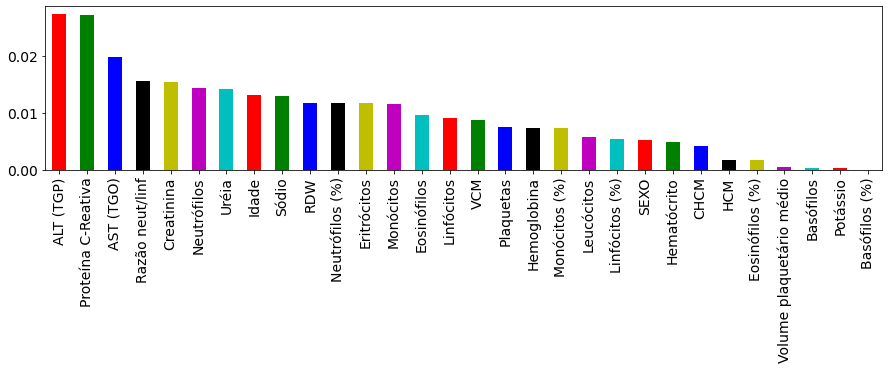

In [41]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi=mi.sort_values(ascending = False)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
mi.plot(kind='bar', color=my_colors, figsize=(15,3))
plt.show()

 A incidência de elevação de enzimas hepáticas, principalmente AST e ALT, em pacientes hospitalizados com Covid-19 varia de 14% a 53%, sendo ainda descrita a elevação discreta de bilirrubina total em até 10% dos casos.

FONTE: https://pebmed.com.br/covid-19-como-e-a-relacao-do-novo-coronavirus-com-o-figado/


### **CROSS VALIDATION**

### **AUC TODAS AS VARIÁVEIS**

In [42]:
#faz o balanceamento das classes
under = RandomUnderSampler(sampling_strategy='majority',  )
X_train, y_train = under.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [44]:
seed = 20

scorer = make_scorer(accuracy_score) # Teste outras

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


gscv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

algorithms = {
    # testar sem hiperparâmetros
    'kNN':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring='roc_auc',
        cv=gscv),
    'tree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring='roc_auc',
        cv=gscv),
    'bigtree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=seed))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring='roc_auc',
        cv=gscv),
    'svmrbf': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(random_state=seed)),
            ('svm', SVC(kernel='rbf', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring='roc_auc',
        cv=gscv),
    'forest': GridSearchCV(  
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('rf', RandomForestClassifier(random_state=seed))]),
        param_grid={
            'rf__max_depth': [1, 5, 10],
            'rf__max_features': ["auto", "sqrt","log2"],
            'rf__n_estimators': [1, 100, 500],
        },
        scoring='roc_auc',
        cv=gscv),
}


In [45]:
ini = time.time()

from sklearn.model_selection import cross_val_score

result = {}
for alg, clf in algorithms.items():
  result[alg] = cross_val_score(clf, X_train, y_train, cv=cv)

result = pd.DataFrame.from_dict(result)
print(result)

fim = time.time()
print('\n')
print('Tempo de execução', round((fim - ini)/60, 4), 'minutos')

        kNN      tree   bigtree  svmlinear    svmrbf    forest
0  0.833333  0.750000  0.750000   0.805556  0.694444  0.722222
1  0.902778  0.666667  0.666667   0.888889  0.777778  1.000000
2  0.861111  0.750000  0.750000   0.833333  0.916667  0.888889
3  0.875000  0.833333  0.833333   0.916667  1.000000  0.972222
4  0.777778  0.916667  0.916667   0.916667  0.916667  1.000000
5  0.666667  0.750000  0.666667   0.916667  0.611111  0.833333
6  0.625000  0.583333  0.500000   0.666667  0.833333  0.861111
7  0.833333  0.750000  0.666667   0.916667  0.805556  1.000000
8  0.750000  0.666667  0.666667   0.694444  0.722222  0.930556
9  0.875000  0.833333  0.833333   0.972222  0.972222  0.944444


Tempo de execução 12.8953 minutos


In [46]:
#novo
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.80 ± 0.09
tree         0.75 ± 0.10
bigtree      0.72 ± 0.12
svmlinear    0.85 ± 0.10
svmrbf       0.82 ± 0.13
forest       0.92 ± 0.09
dtype: object

In [ ]:
#antigo
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.69 ± 0.06
tree         0.78 ± 0.10
bigtree      0.96 ± 0.01
svmlinear    0.62 ± 0.17
svmrbf       0.75 ± 0.10
forest       0.92 ± 0.06
dtype: object

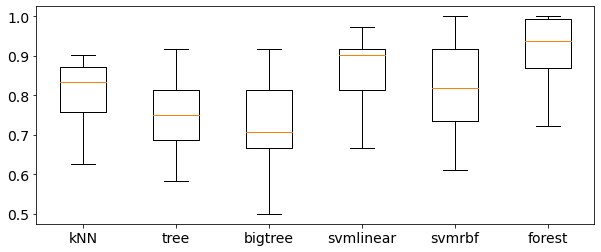

In [49]:
#novo
plt.boxplot([ scores for alg, scores in result.iteritems() ])
plt.xticks(1 + np.arange(result.shape[1]), result.columns)
plt.gcf().set_size_inches(10, 4)
plt.show()

https://estatsite.com.br/2020/09/27/random-forest-em-python/

https://scikit-learn.org/stable/auto_examples/ensemble/plot_feature_transformation.html